In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
init_printing()

In [3]:
x = np.linspace(1, 100, 100)

In [4]:
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [5]:
y = np.linspace(107, 404, 100)
y

array([107., 110., 113., 116., 119., 122., 125., 128., 131., 134., 137.,
       140., 143., 146., 149., 152., 155., 158., 161., 164., 167., 170.,
       173., 176., 179., 182., 185., 188., 191., 194., 197., 200., 203.,
       206., 209., 212., 215., 218., 221., 224., 227., 230., 233., 236.,
       239., 242., 245., 248., 251., 254., 257., 260., 263., 266., 269.,
       272., 275., 278., 281., 284., 287., 290., 293., 296., 299., 302.,
       305., 308., 311., 314., 317., 320., 323., 326., 329., 332., 335.,
       338., 341., 344., 347., 350., 353., 356., 359., 362., 365., 368.,
       371., 374., 377., 380., 383., 386., 389., 392., 395., 398., 401.,
       404.])

In [6]:
y = y + 101*np.sin(y*4*np.sin(y*3)/10)

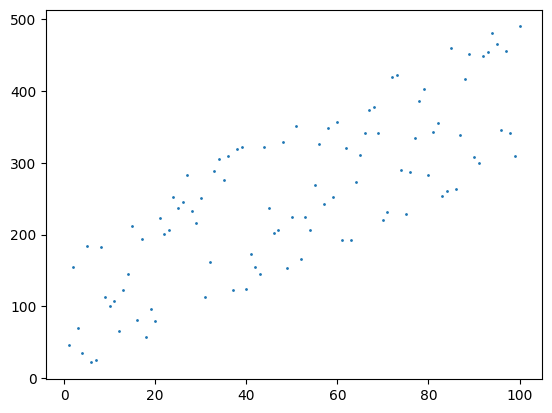

In [7]:
plt.scatter(x,y, s=1)

In [8]:
X = np.vstack((np.ones(100),x))

In [9]:
X = X.astype(int).T

In [10]:
X.shape

In [11]:
y.shape

In [12]:
Y=y.reshape((-1, 1))

In [13]:
Y.shape

In [14]:
X.T @ X

array([[   100,   5050],
       [  5050, 338350]])

In [15]:
np.linalg.inv(X.T @ X)

array([[ 4.06060606e-02, -6.06060606e-04],
       [-6.06060606e-04,  1.20012001e-05]])

In [16]:
sol = np.linalg.inv(X.T @ X) @ X.T @ Y

In [17]:
sol

array([[95.90945222],
       [ 3.13973425]])

In [18]:
(X @ sol).T        #predicted y (y-hat)

array([[ 99.04918647, 102.18892071, 105.32865496, 108.46838921,
        111.60812345, 114.7478577 , 117.88759195, 121.02732619,
        124.16706044, 127.30679469, 130.44652893, 133.58626318,
        136.72599743, 139.86573167, 143.00546592, 146.14520017,
        149.28493441, 152.42466866, 155.56440291, 158.70413715,
        161.8438714 , 164.98360565, 168.12333989, 171.26307414,
        174.40280839, 177.54254263, 180.68227688, 183.82201113,
        186.96174537, 190.10147962, 193.24121387, 196.38094811,
        199.52068236, 202.66041661, 205.80015085, 208.9398851 ,
        212.07961934, 215.21935359, 218.35908784, 221.49882208,
        224.63855633, 227.77829058, 230.91802482, 234.05775907,
        237.19749332, 240.33722756, 243.47696181, 246.61669606,
        249.7564303 , 252.89616455, 256.0358988 , 259.17563304,
        262.31536729, 265.45510154, 268.59483578, 271.73457003,
        274.87430428, 278.01403852, 281.15377277, 284.29350702,
        287.43324126, 290.57297551, 293.

In [19]:
r = X @ sol - Y        #residuals, prediction minus Y data

In [20]:
r.T

array([[  53.54905119,  -52.50440101,   35.85544064,   73.60092457,
         -72.48387445,   93.19341079,   93.43423815,  -62.18021871,
          10.92512587,   26.86810488,   23.80037511,   67.59943419,
          13.65277862,   -5.70441   ,  -68.44352902,   65.85754576,
         -44.73720463,   95.00700019,   58.88630869,   79.88674714,
         -61.42108828,  -35.25418311,  -37.63561773,  -81.59623143,
         -63.12947064,  -67.54990878, -102.8775475 ,  -49.3894709 ,
         -28.73115258,  -60.33411996,   81.05034572,   35.06035204,
         -88.41244058, -102.74809671,  -70.35761428,  -99.86941086,
          89.12167111, -103.53779335, -103.41819681,   97.30241139,
          51.59617256,   72.60191587,   85.4607365 ,  -87.84850468,
           0.17587165,   37.64094517,   37.64484978,  -82.17436568,
          96.50013304,   27.83541513,  -95.54869675,   93.04590968,
          38.41901012,   59.05640412,   -0.49741191,  -54.66487687,
          31.94912003,  -69.95200238,   28.62162

In [21]:
(r**2).T

array([[2.86750088e+03, 2.75671213e+03, 1.28561262e+03, 5.41709610e+03,
        5.25391205e+03, 8.68501181e+03, 8.72995686e+03, 3.86637960e+03,
        1.19358375e+02, 7.21895060e+02, 5.66457855e+02, 4.56968350e+03,
        1.86398364e+02, 3.25402934e+01, 4.68451666e+03, 4.33721633e+03,
        2.00141748e+03, 9.02633008e+03, 3.46759735e+03, 6.38189237e+03,
        3.77255009e+03, 1.24285743e+03, 1.41643972e+03, 6.65794498e+03,
        3.98533006e+03, 4.56299018e+03, 1.05837898e+04, 2.43931984e+03,
        8.25479129e+02, 3.64020603e+03, 6.56915854e+03, 1.22922829e+03,
        7.81675965e+03, 1.05571714e+04, 4.95019389e+03, 9.97389923e+03,
        7.94267226e+03, 1.07200747e+04, 1.06953234e+04, 9.46775926e+03,
        2.66216502e+03, 5.27103819e+03, 7.30353748e+03, 7.71735978e+03,
        3.09308382e-02, 1.41684075e+03, 1.41713472e+03, 6.75262637e+03,
        9.31227568e+03, 7.74810335e+02, 9.12955345e+03, 8.65754131e+03,
        1.47602034e+03, 3.48765887e+03, 2.47418604e-01, 2.988248

In [22]:
np.sum(r**2)

In [23]:
mod = sm.OLS(y,X, hasconst = True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           4.24e-23
Time:                        22:01:30   Log-Likelihood:                -565.16
No. Observations:                 100   AIC:                             1134.
Df Residuals:                      98   BIC:                             1140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.9095     14.025      6.839      0.0

In [24]:
res.pvalues

array([6.90881944e-10, 4.23894214e-23])

In [25]:
np.mean(Y)

In [26]:
sum((Y-np.mean(Y))**2)     #total sum of squares SST

array([1296126.68859908])

In [27]:
sum(r**2)                  #residual sum of squares, SSR

array([474714.5764028])

In [37]:
1 - (sum(r**2) / sum((Y-np.mean(Y))**2))     #coeff of determination R^2

array([0.63374369])